<a href="https://colab.research.google.com/github/Ram04420/TensorFlow/blob/master/Dogs_and_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!mkdir -p ~/.kaggle
#!cp kaggle.json ~/.kaggle/
#!chmod 600 ~/.kaggle/kaggle.json
#!kaggle competitions download -c dogs-vs-cats
#!pip install --upgrade kaggle
#!pip install -q kaggle
#!kaggle -v
#!pip install --upgrade --force-reinstall --no-deps kaggle

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D, ZeroPadding2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [42]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git

fatal: destination path 'dog-cat-full-dataset' already exists and is not an empty directory.


In [0]:
test_data_dir = '/content/dog-cat-full-dataset/data/test'
train_data_dir = '/content/dog-cat-full-dataset/data/train'

In [0]:
img_width = 32
img_height = 32
batch_size = 20

In [0]:
datagen = ImageDataGenerator(rescale=1./255)

In [46]:
train_genrator = datagen.flow_from_directory(directory= train_data_dir,
                                             target_size = (img_width, img_height),
                                             class_mode = 'binary',
                                             classes = ['dogs', 'cats'],
                                             batch_size = batch_size)

Found 20000 images belonging to 2 classes.


In [47]:
train_genrator.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [48]:
validation_genrator = datagen.flow_from_directory(directory=test_data_dir,
                                                  target_size = (32,32),
                                                  classes = ['dogs', 'cats'],
                                                  class_mode = 'binary',
                                                  batch_size = batch_size)

Found 5000 images belonging to 2 classes.


In [49]:
len(train_genrator)*batch_size

20000

**Build CNN base Model**

In [0]:
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape= (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [52]:
history = model.fit_generator(generator=train_genrator, steps_per_epoch=len(train_genrator), verbose=1, epochs=5, validation_data=validation_genrator,validation_steps=len(validation_genrator))

Epoch 1/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.6988 - accuracy: 0.5099 - val_loss: 0.6932 - val_accuracy: 0.5004
Epoch 2/5
1000/1000 [==============================] - 97s 97ms/step - loss: 0.6935 - accuracy: 0.4997 - val_loss: 0.6930 - val_accuracy: 0.5094
Epoch 3/5
1000/1000 [==============================] - 99s 99ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6935 - val_accuracy: 0.5004
Epoch 4/5
1000/1000 [==============================] - 96s 96ms/step - loss: 0.6854 - accuracy: 0.5380 - val_loss: 0.6876 - val_accuracy: 0.5428
Epoch 5/5
1000/1000 [==============================] - 95s 95ms/step - loss: 0.6323 - accuracy: 0.6409 - val_loss: 0.5681 - val_accuracy: 0.7128


In [0]:

def plot_learningCurve(history):
  #plot training accuracy values
  epoch_range = range(1, 6)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'], loc = 'upper left')
  plt.show()
  #plot taining loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()


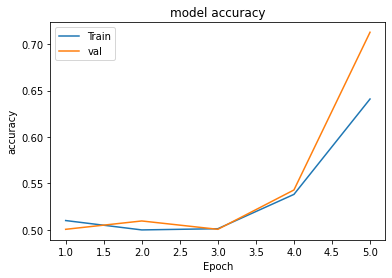

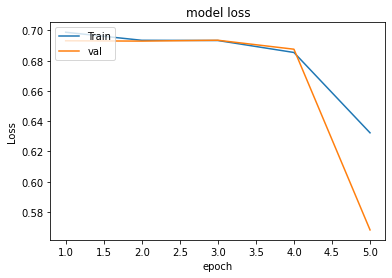

In [59]:
plot_learningCurve(history)

**Implemation First 3 blocks of VGG16 Model**

In [0]:
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape= (img_width, img_height, 3)))
model.add(MaxPool2D(2,2))


model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))


model.add(Conv2D(filters= 256, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))

model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [63]:
history = model.fit_generator(generator=train_genrator, steps_per_epoch=len(train_genrator), verbose=1, epochs=5, validation_data=validation_genrator,validation_steps=len(validation_genrator))

Epoch 1/5
1000/1000 [==============================] - 201s 201ms/step - loss: 0.6195 - accuracy: 0.6493 - val_loss: 0.6005 - val_accuracy: 0.6822
Epoch 2/5
1000/1000 [==============================] - 199s 199ms/step - loss: 0.5086 - accuracy: 0.7523 - val_loss: 0.5164 - val_accuracy: 0.7420
Epoch 3/5
1000/1000 [==============================] - 201s 201ms/step - loss: 0.4523 - accuracy: 0.7918 - val_loss: 0.4775 - val_accuracy: 0.7706
Epoch 4/5
1000/1000 [==============================] - 204s 204ms/step - loss: 0.4048 - accuracy: 0.8138 - val_loss: 0.4556 - val_accuracy: 0.7840
Epoch 5/5
1000/1000 [==============================] - 200s 200ms/step - loss: 0.3664 - accuracy: 0.8360 - val_loss: 0.4581 - val_accuracy: 0.7790


**Batch Noramlization and DropOut**

In [0]:
model = Sequential()
model.add(Conv2D(filters= 64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape= (img_width, img_height, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))



model.add(Conv2D(filters= 128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(filters= 256, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics='accuracy')

In [67]:
history = model.fit_generator(generator=train_genrator, steps_per_epoch=len(train_genrator), verbose=1, epochs=10, validation_data=validation_genrator,validation_steps=len(validation_genrator))

Epoch 1/10
1000/1000 [==============================] - 231s 231ms/step - loss: 0.6765 - accuracy: 0.6265 - val_loss: 0.7585 - val_accuracy: 0.6844
Epoch 2/10
1000/1000 [==============================] - 227s 227ms/step - loss: 0.5967 - accuracy: 0.6882 - val_loss: 0.6485 - val_accuracy: 0.7348
Epoch 3/10
1000/1000 [==============================] - 230s 230ms/step - loss: 0.5545 - accuracy: 0.7204 - val_loss: 0.5646 - val_accuracy: 0.7186
Epoch 4/10
1000/1000 [==============================] - 232s 232ms/step - loss: 0.5148 - accuracy: 0.7476 - val_loss: 0.5210 - val_accuracy: 0.7444
Epoch 5/10
1000/1000 [==============================] - 231s 231ms/step - loss: 0.4939 - accuracy: 0.7638 - val_loss: 0.5438 - val_accuracy: 0.7238
Epoch 6/10
1000/1000 [==============================] - 230s 230ms/step - loss: 0.4738 - accuracy: 0.7769 - val_loss: 0.4472 - val_accuracy: 0.7944
Epoch 7/10
1000/1000 [==============================] - 234s 234ms/step - loss: 0.4558 - accuracy: 0.7879 - val_

In [0]:

def plot_learningCurve(history, epoch):
  #plot training accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()
  #plot taining loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('Loss')
  plt.xlabel('epoch')
  plt.legend(['Train', 'val'], loc = 'upper left')
  plt.show()


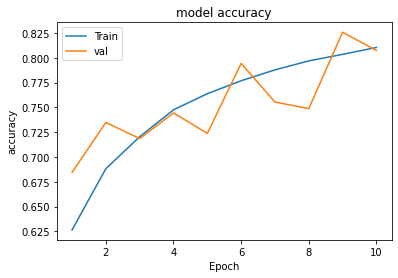

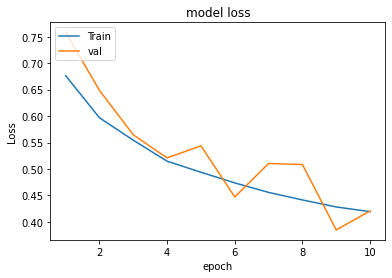

In [69]:
plot_learningCurve(history, 10)